In [35]:
# Importar librerias
import sympy as sp

In [36]:
# definir simbolos
x_s = sp.Symbol("x")
t_s = sp.Symbol("t")
m_s = sp.Symbol("m")
g_s = sp.Symbol("g")
k_s = sp.Symbol("k", nonzero=True)
C1_s = sp.Symbol("C1")
C2_s = sp.Symbol("C2")
v_s = sp.Function("v")(t_s)

In [37]:
# definir ecu dif
eqq = sp.Eq(v_s.diff(t_s) - (m_s * g_s - v_s * k_s) / m_s, 0)
eqq

Eq(Derivative(v(t), t) - (g*m - k*v(t))/m, 0)

In [38]:
# resolver ecu dif
sol = sp.dsolve(eqq)
v_fun = sol.rhs
sol

Eq(v(t), C1*exp(-k*t/m) + g*m/k)

In [39]:
# substituir valores
ff_time = 3
m = 560
g = 9.81
k = 600
C1 = (-g * m) / k


def_v_fun = v_fun.subs({C1_s: C1, k_s: k, g_s: g, m_s: m}) + (g * ff_time)

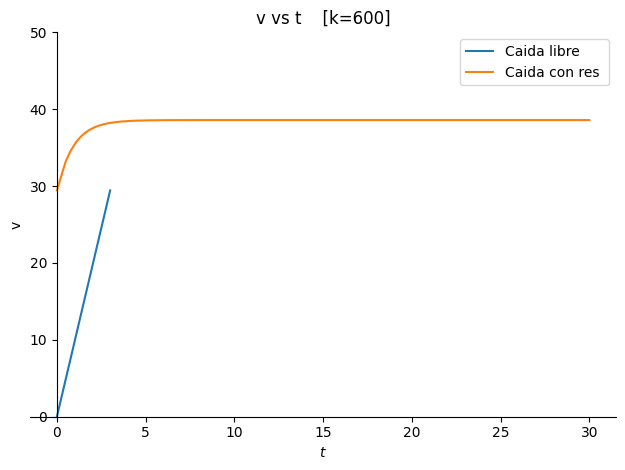

In [40]:
# graficar v vs t
p1 = sp.plot(
    g * t_s,
    (t_s, 0, ff_time),
    ylim=[0, 50],
    ylabel="v",
    legend=True,
    title=f"v vs t    [k={k}]",
    show=False,
    label="Caida libre ",
)
p2 = sp.plot(
    def_v_fun,
    (t_s, 0, 30),
    label="Caida con res ",
    show=False,
)
p1.extend(p2)
p1.show()

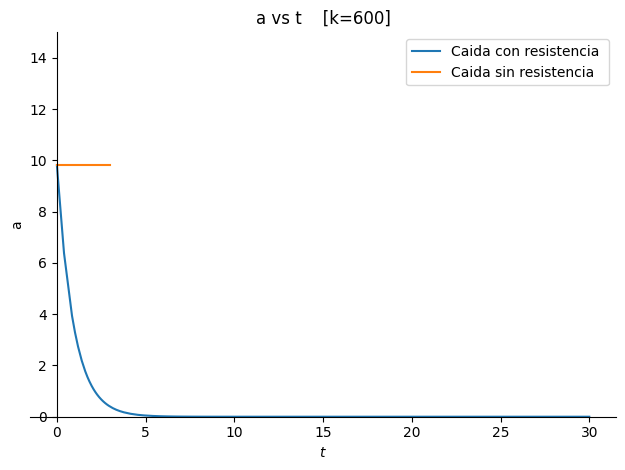

In [41]:
# graficar a vs t
p1 = sp.plot(
    def_v_fun.diff(t_s),
    (t_s, 0, 30),
    ylim=[0, 15],
    ylabel="a",
    legend=True,
    title=f"a vs t    [k={k}]",
    show=False,
    label="Caida con resistencia ",
)
p2 = sp.plot(g, (t_s, 0, ff_time), label="Caida sin resistencia ", show=False)
p1.extend(p2)
p1.show()

# Parte 2


In [42]:
# obtener funcion de posicion respecto a tiempo, integrando vel
fpos = sp.integrate(v_fun, t_s) + C2_s
fpos

-C1*m*exp(-k*t/m)/k + C2 + g*m*t/k

In [43]:
# encontrar constante de inegracion cuando t = 0 y x = 0
C2 = sp.solve(sp.Eq(fpos, 0).subs({t_s: 0}), C2_s)[0]
C2

C1*m/k

In [44]:
# substituir valores para graficar
def_fpos = fpos.subs(
    {
        C1_s: C1,
        C2_s: C2.subs({C1_s: C1, k_s: k, g_s: g, m_s: m}),
        k_s: k,
        g_s: g,
        m_s: m,
    }
)
def_fpos

9.156*t - 8.5456 + 8.5456*exp(-15*t/14)

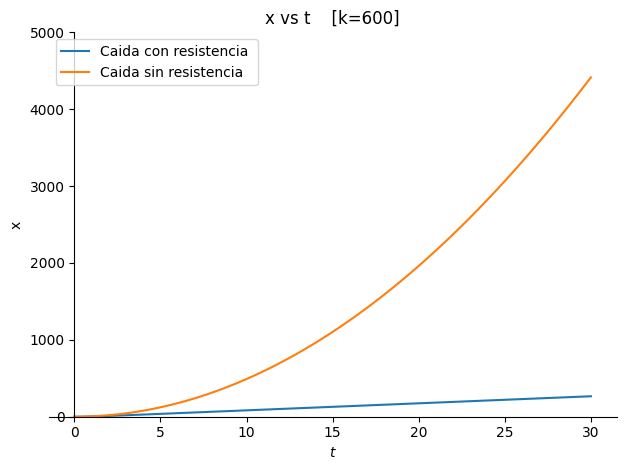

In [45]:
# graficar x vs t
p1 = sp.plot(
    def_fpos,
    (t_s, 0, 30),
    ylim=[0, 5000],
    ylabel="x",
    legend=True,
    title=f"x vs t    [k={k}]",
    show=False,
    label="Caida con resistencia ",
)
ft = (1 / 2) * g * t_s**2
p2 = sp.plot(ft, (t_s, 0, 30), label="Caida sin resistencia ", show=False)
p1.extend(p2)
p1.show()